In [54]:
import pickle
import os
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

In [55]:
# These files are the cleaned data from the original files
temp_file = r"D:\Savant\Data\ALL_5Min_TEMPS.pkl"
temp_df = pd.read_pickle(temp_file)

wind_file = r"D:\Savant\Data\ALL_5Min_WIND.pkl"
wind_df = pd.read_pickle(wind_file)

tke_file = r"D:\Savant\Data\ALL_5Min_TKE.pkl"
tke_df = pd.read_pickle(tke_file)



In [56]:
# Load the inversion data from the pickle files 
# https://emailsc-my.sharepoint.com/:f:/r/personal/hiscox_mailbox_sc_edu/Documents/Research/SAVANT/SAVANT%20Data/Level%20X%20-%20In%20Analysis?csf=1&web=1&e=A9VDY3
inv_file = r"D:\Savant\Data\inversiontimeswithwinds.pkl"
invdf = pd.read_pickle(inv_file)
srall_file = r"D:\Savant\Data\SRAll.pkl"
SR=pd.read_pickle(srall_file)
print("inversion data loaded")

inversion data loaded


In [57]:
# Correct __
invdf["Inv location"] = invdf["Inv location"].str.replace("Rel__", "Rel_")
invdf["Inv location"].unique()

# create new columsn for the tower and depth
invdf[['Tower', 'Depth']] = invdf["Inv location"].str.split("_", expand=True)

In [58]:
# over 300 columns in the inversion data. Drop the ones that are not needed we will get them back later.
for c in invdf.columns:
    print(c)

Inversion Start
Inversion End
Duration (min)
Strength
Max in period
Min in period
Inv Class
Inv location
Lapse rate
harvest status
spd_15m_lconv
spd_4_5m_uconv
spd_6m_init
spd_4_5m_rel
spd_a2_1_5m_uconv
spd_10m_init
spd_10m_rel
spd_1_5m_init
spd_6m_uconv
spd_3m_rel
spd_a2_1_5m_lconv
spd_4_5m_init
spd_20m_lconv
spd_6m_rel
spd_1_5m_uconv
spd_6m_lconv
Spd_0_2m_uconv
spd_10m_lconv
spd_15m_rel
spd_a2_1_5m_rel
spd_4_5m_lconv
spd_3m_lconv
spd_1_5m_rel
spd_a1_1_5m_lconv
spd_3m_uconv
Spd_0_2m_rel
spd_a1_1_5m_uconv
spd_20m_rel
spd_8_5m_rel
spd_3m_init
spd_8_5m_lconv
Spd_0_2m_init
Spd_0_2m_lconv
spd_a1_1_5m_rel
spd_1_5m_lconv
spd_10m_uconv
dir_15m_lconv
dir_4_5m_uconv
dir_6m_init
dir_4_5m_rel
dir_a2_1_5m_uconv
dir_10m_init
dir_10m_rel
dir_1_5m_init
dir_6m_uconv
dir_3m_rel
dir_a2_1_5m_lconv
dir_4_5m_init
dir_20m_lconv
dir_6m_rel
dir_1_5m_uconv
dir_6m_lconv
Dir_0_2m_uconv
dir_10m_lconv
dir_15m_rel
dir_4_5m_lconv
dir_3m_lconv
dir_1_5m_rel
dir_a1_1_5m_lconv
dir_3m_uconv
Dir_0_2m_rel
dir_a1_1_5m_uconv

In [59]:
# Dont want all the columns.
cols = ['Inversion Start','Inversion End','Duration (min)','Strength','Max in period','Min in period','Inv Class','Inv location','Lapse rate','harvest status','onsethour','month','day','Tower','Depth']
invdf = invdf[cols]

In [60]:
# create a custom index for the inversion data that is 0 to .. n
invdf['Inv ID'] = range(1, len(invdf) + 1)
invdf.set_index('Inv ID', inplace=True)
invdf

,Inversion Start,Inversion End,Duration (min),Strength,Max in period,Min in period,Inv Class,Inv location,Lapse rate,harvest status,onsethour,month,day,Tower,Depth
Inv ID,,,,,,,,,,,,,,,
1,2018-09-28 00:02:30,2018-09-28 08:57:30,535.0,0.517490,3.881577,0.056290,long,Lcon_deep,0.073927,pre-harvest,0,9,28,Lcon,deep
2,2018-09-28 23:52:30,2018-09-28 23:52:30,5.0,0.001105,0.001105,0.001105,micro,Lcon_deep,0.000158,pre-harvest,23,9,28,Lcon,deep
3,2018-09-29 00:02:30,2018-09-29 00:02:30,5.0,0.001326,0.001326,0.001326,micro,Lcon_deep,0.000189,pre-harvest,0,9,29,Lcon,deep
4,2018-09-29 00:12:30,2018-09-29 00:57:30,45.0,0.023399,0.037335,0.006511,short,Lcon_deep,0.003343,pre-harvest,0,9,29,Lcon,deep
5,2018-09-29 01:07:30,2018-09-29 01:07:30,5.0,0.014698,0.014698,0.014698,micro,Lcon_deep,0.002100,pre-harvest,1,9,29,Lcon,deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,2018-11-16 00:42:30,2018-11-16 14:12:30,810.0,0.128578,0.397819,0.009161,extreme,Init_shal,0.042859,post-harvest,0,11,16,Init,shal
1735,2018-11-16 14:52:30,2018-11-16 19:52:30,300.0,0.083082,0.141290,0.024749,long,Init_shal,0.027694,post-harvest,14,11,16,Init,shal
1736,2018-11-16 20:07:30,2018-11-17 13:57:30,1070.0,0.214461,1.216811,0.016455,extreme,Init_shal,0.071487,post-harvest,20,11,16,Init,shal


In [68]:
# the cell adds data to dictionaries for each inversion. And will included 
pre_harvest_inv_dict = {}
harvest_inv_dict = {}
post_harvest_inv_dict = {}

# for each inversion in invdf, pull data from wind_df, temp_df, and tke_df for each inversion time

for row in invdf.iterrows():                  # for row in invdf[0:10].iterrows(): # for testing only
    start = row[1]['Inversion Start']
    end = row[1]['Inversion End']
    tower = row[1]['Tower']
    depth = row[1]['Depth']
    duration = row[1]['Duration (min)']
    strength = row[1]['Strength']
    
    # Actual Pandas datetime objects Wind, Temp and TKE
    wind = wind_df[(wind_df.index >= start) & (wind_df.index <= end)]
    wind = wind.reset_index(drop=False)  # reindex wind to 0 to ...n
    wind['min_after_onset'] = wind.index * 5
    wind['norm_time'] = wind['min_after_onset'] / duration  # normalize time to 0 to 1

    temp = temp_df[(temp_df.index >= start) & (temp_df.index <= end)]
    temp = temp.reset_index(drop=False)  # reindex temp to 0 to ...n
    temp['min_after_onset'] = temp.index * 5
    temp['norm_time'] = temp['min_after_onset'] / duration  # normalize time to 0 to 1

    tke = tke_df[(tke_df.index >= start) & (tke_df.index <= end)]
    tke = tke.reset_index(drop=False)  # reindex tke to 0 to ...n
    tke['min_after_onset'] = tke.index * 5
    tke['norm_time'] = tke['min_after_onset'] / duration  # normalize time to 0 to 1

    if row[1]['harvest status'] == "pre-harvest":
        pre_harvest_inv_dict[row[0]] = {"start": start,
                                        "end": end,
                                        "tower": tower,
                                        "depth": depth,
                                        "wind": wind,
                                        "temp": temp,
                                        "tke": tke
                                    }
    elif row[1]['harvest status'] == "harvest":
        harvest_inv_dict[row[0]] = {"start": start,
                                        "end": end,
                                        "tower": tower,
                                        "depth": depth,
                                        "wind": wind,
                                        "temp": temp,
                                        "tke": tke
                                    }
    elif row[1]['harvest status'] == "post-harvest":
        post_harvest_inv_dict[row[0]] = {"start": start,
                                        "end": end,
                                        "tower": tower,
                                        "depth": depth,
                                        "wind": wind,
                                        "temp": temp,
                                        "tke": tke
                                    }
    else:
        print(f"Error: harvest status not found{start} {end} {tower}")


In [69]:
# Checking to make sure we haven't lost any data expecting 1738
len(pre_harvest_inv_dict)+ len(harvest_inv_dict)+ len(post_harvest_inv_dict)

1738

In [71]:
# Trying to sort and group data.
towers = ['Init', 'Rel', 'Uconv', 'Lconv']

init_cols = [c for c in wind_df.columns if "init" in c]
rel_cols = [c for c in wind_df.columns if "rel" in c]
uconv_cols = [c for c in wind_df.columns if "uconv" in c]
lconv_cols = [c for c in wind_df.columns if "lconv" in c]

print(len(init_cols), len(rel_cols), len(uconv_cols), len(lconv_cols))
# Function to extract the height as a float
def extract_height(s):
    match = re.search(r'spd_(\d+_?\d*)m', s)
    if match:
        return float(match.group(1).replace('_', '.'))
    return float('inf')  # Fallback if pattern doesn't match

# Test on all columns
sorted_data = sorted(init_cols + rel_cols + uconv_cols + lconv_cols, key=extract_height)
print(sorted_data)

for t in towers:
    print(f"Tower: {t}")
    print([c for c in sorted_data if t.lower() in c and "spd" in c])

12 22 16 22
['spd_1_5m_init', 'spd_1_5m_rel', 'spd_1_5m_uconv', 'spd_1_5m_lconv', 'spd_3m_init', 'spd_3m_rel', 'spd_3m_uconv', 'spd_3m_lconv', 'spd_4_5m_init', 'spd_4_5m_rel', 'spd_4_5m_uconv', 'spd_4_5m_lconv', 'spd_6m_init', 'spd_6m_rel', 'spd_6m_uconv', 'spd_6m_lconv', 'spd_8_5m_rel', 'spd_8_5m_lconv', 'spd_10m_init', 'spd_10m_rel', 'spd_10m_uconv', 'spd_10m_lconv', 'spd_15m_rel', 'spd_15m_lconv', 'spd_20m_rel', 'spd_20m_lconv', 'Spd_0_2m_init', 'dir_6m_init', 'dir_10m_init', 'dir_1_5m_init', 'dir_4_5m_init', 'dir_3m_init', 'Dir_0_2m_init', 'spd_a2_1_5m_rel', 'Spd_0_2m_rel', 'spd_a1_1_5m_rel', 'dir_4_5m_rel', 'dir_10m_rel', 'dir_3m_rel', 'dir_6m_rel', 'dir_15m_rel', 'dir_1_5m_rel', 'Dir_0_2m_rel', 'dir_20m_rel', 'dir_8_5m_rel', 'dir_a2_1_5m_rel', 'dir_a1_1_5m_rel', 'spd_a2_1_5m_uconv', 'Spd_0_2m_uconv', 'spd_a1_1_5m_uconv', 'dir_4_5m_uconv', 'dir_a2_1_5m_uconv', 'dir_6m_uconv', 'dir_1_5m_uconv', 'Dir_0_2m_uconv', 'dir_3m_uconv', 'dir_a1_1_5m_uconv', 'dir_10m_uconv', 'spd_a2_1_5m_lco

In [72]:
# Establish the tower names and heights for the plot
towers = ['Init', 'Rel', 'Uconv', 'Lconv']
heights = [10,6,4.5,3,1.5] #[1.5, 3, 4.5, 6, 10]

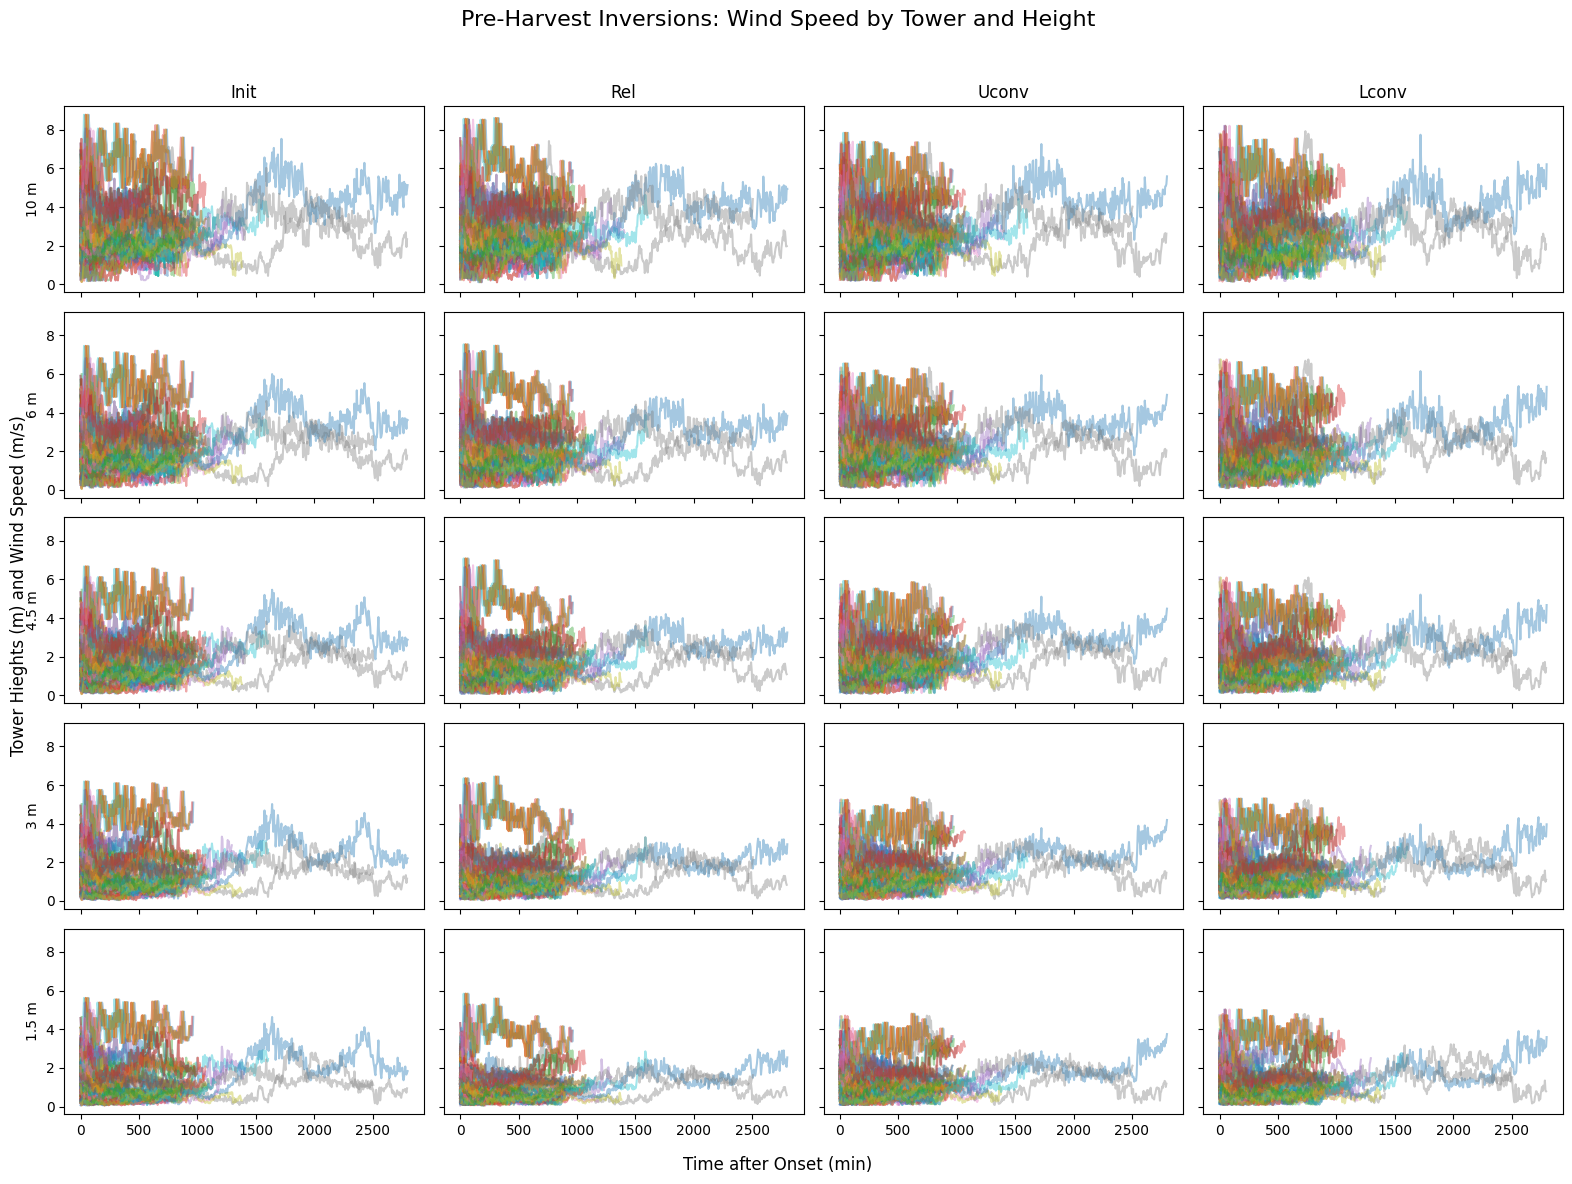

In [78]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 12), sharex=True, sharey=True)

# for every pre-harvest inversion, plot the wind data for each tower at all heights
for d, inv in pre_harvest_inv_dict.items():
    wind = inv['wind']
    
    for col_i, tower in enumerate(towers):
        for row_j, height in enumerate(heights):
            # Match column pattern like 'spd_1_5m_init'
            height_str = str(height).replace('.', '_')
            search_str = f"spd_{height_str}m_{tower.lower()}"
            matching_cols = [c for c in wind.columns if c == search_str]
            
            if matching_cols:
                axes[row_j, col_i].plot(
                    wind['min_after_onset'], 
                    wind[matching_cols[0]], 
                    alpha=0.4  # to avoid overplotting
                )

# Set labels and titles
for i, tower in enumerate(towers):
    axes[0, i].set_title(tower)

for j, height in enumerate(heights):
    axes[j, 0].set_ylabel(f"{height} m")

fig.suptitle("Pre-Harvest Inversions: Wind Speed by Tower and Height", fontsize=16)

# Add a common labels
fig.supylabel("Tower Hieghts (m) and Wind Speed (m/s)")
fig.supxlabel("Time after Onset (min)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


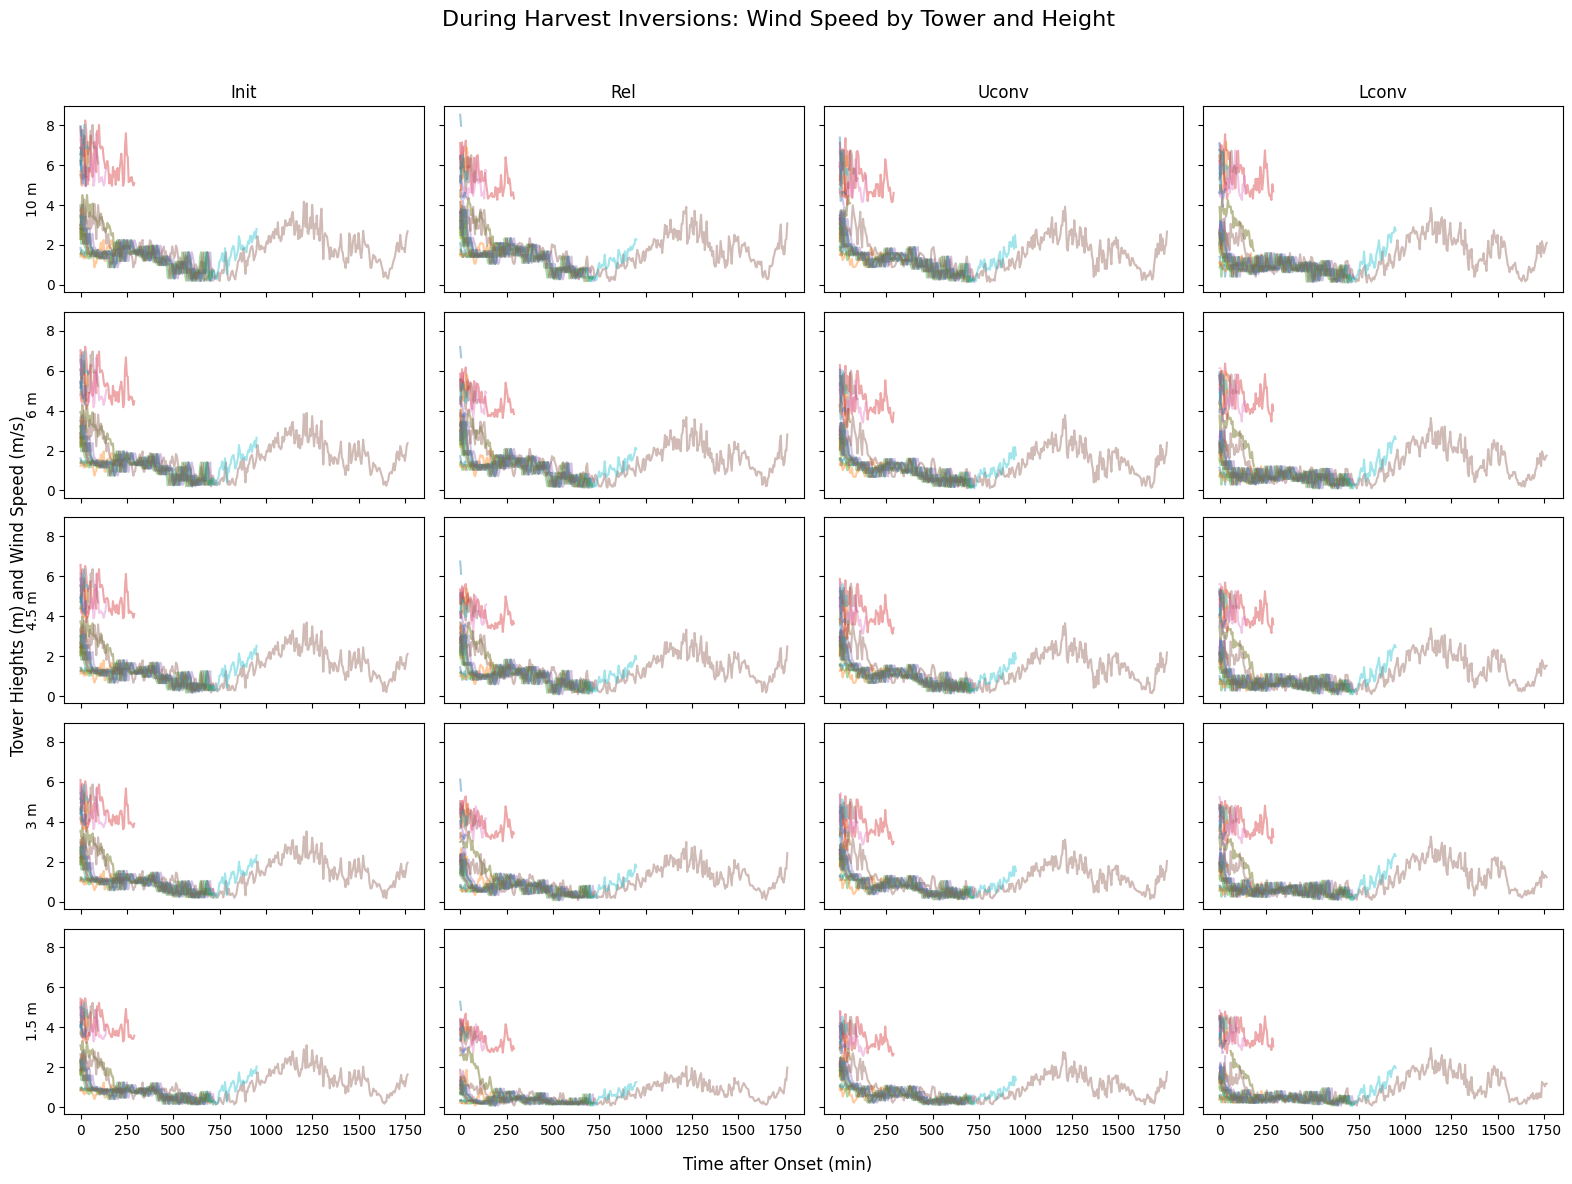

In [79]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 12), sharex=True, sharey=True)

# for every pre-harvest inversion, plot the wind data for each tower at all heights
for d, inv in harvest_inv_dict.items():
    wind = inv['wind']
    
    for col_i, tower in enumerate(towers):
        for row_j, height in enumerate(heights):
            # Match column pattern like 'spd_1_5m_init'
            height_str = str(height).replace('.', '_')
            search_str = f"spd_{height_str}m_{tower.lower()}"
            matching_cols = [c for c in wind.columns if c == search_str]
            
            if matching_cols:
                axes[row_j, col_i].plot(
                    wind['min_after_onset'], 
                    wind[matching_cols[0]], 
                    alpha=0.4  # to avoid overplotting
                )

# Set labels and titles
for i, tower in enumerate(towers):
    axes[0, i].set_title(tower)

for j, height in enumerate(heights):
    axes[j, 0].set_ylabel(f"{height} m")

fig.suptitle("During Harvest Inversions: Wind Speed by Tower and Height", fontsize=16)
# Add a common labels
fig.supylabel("Tower Hieghts (m) and Wind Speed (m/s)")
fig.supxlabel("Time after Onset (min)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


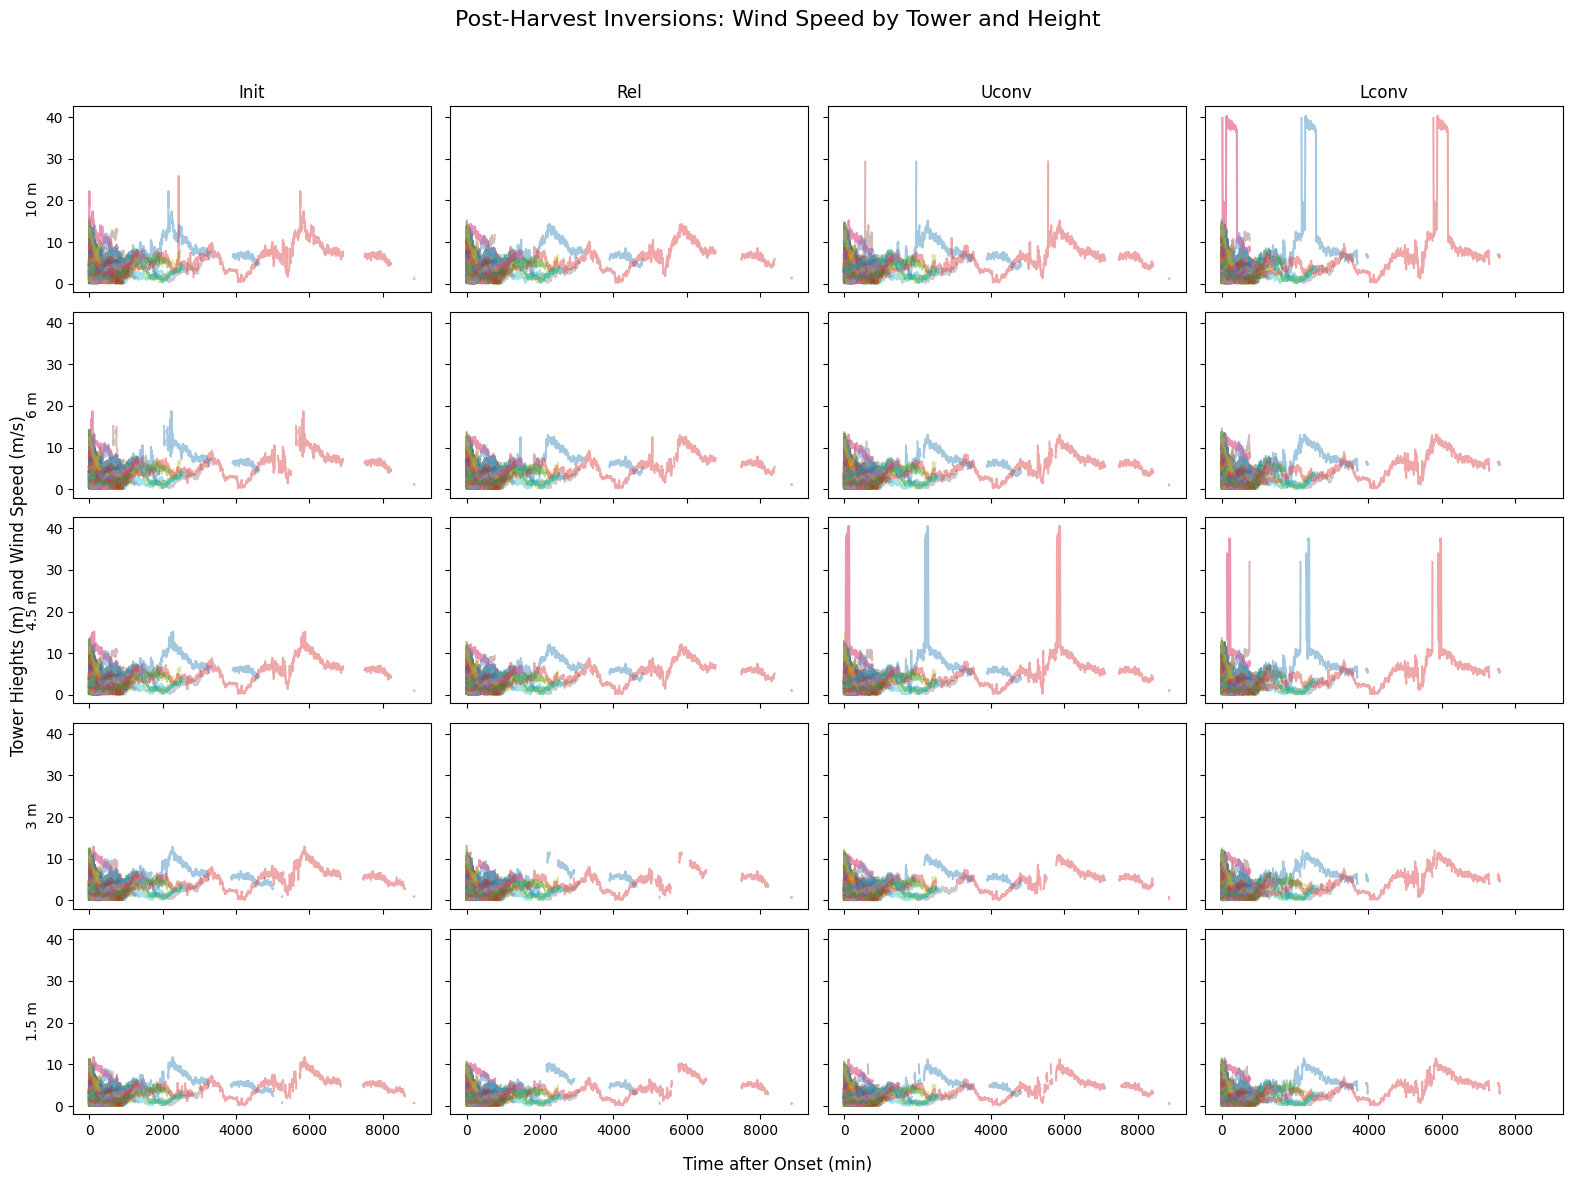

In [80]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 12), sharex=True, sharey=True)

# for every pre-harvest inversion, plot the wind data for each tower at all heights
for d, inv in post_harvest_inv_dict.items():
    wind = inv['wind']
    
    for col_i, tower in enumerate(towers):
        for row_j, height in enumerate(heights):
            # Match column pattern like 'spd_1_5m_init'
            height_str = str(height).replace('.', '_')
            search_str = f"spd_{height_str}m_{tower.lower()}"
            matching_cols = [c for c in wind.columns if c == search_str]
            
            if matching_cols:
                axes[row_j, col_i].plot(
                    wind['min_after_onset'], 
                    wind[matching_cols[0]], 
                    alpha=0.4  # to avoid overplotting
                )

# Set labels and titles
for i, tower in enumerate(towers):
    axes[0, i].set_title(tower)

for j, height in enumerate(heights):
    axes[j, 0].set_ylabel(f"{height} m")

fig.suptitle("Post-Harvest Inversions: Wind Speed by Tower and Height", fontsize=16)
# Add a common labels
fig.supylabel("Tower Hieghts (m) and Wind Speed (m/s)")
fig.supxlabel("Time after Onset (min)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


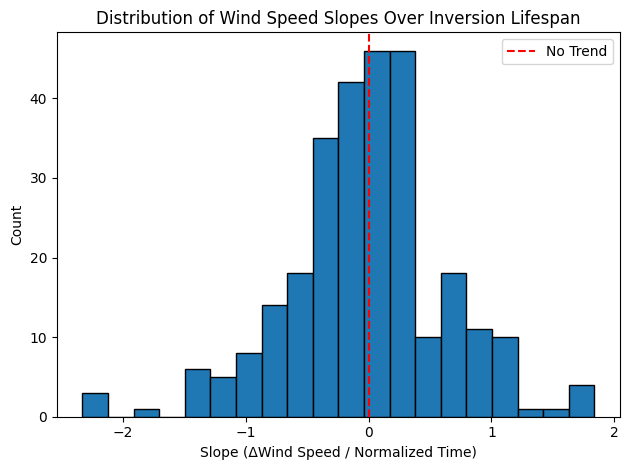

Mean slope = -0.0211, t = -0.55, p = 0.5859


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# For storing slopes of each inversion's trend line
slopes = []

# Define the wind column to analyze
target_col = 'spd_1_5m_init'  # change as needed

for key, data in pre_harvest_inv_dict.items():
    wind_df = data['wind']

    # Sanity check: skip if not enough data or missing column
    if target_col not in wind_df.columns or len(wind_df) < 5:
        continue

    # Drop NaNs just in case
    wind_series = wind_df[[target_col, 'norm_time']].dropna()

    # Linear regression: wind speed ~ normalized time
    slope, intercept, r_value, p_value, std_err = linregress(
        wind_series['norm_time'], wind_series[target_col]
    )

    slopes.append(slope)

# === Analysis of all slopes ===
slopes = np.array(slopes)
positive_trend_ratio = np.sum(slopes > 0) / len(slopes)

# Histogram of slopes
plt.hist(slopes, bins=20, edgecolor='k')
plt.title("Distribution of Wind Speed Slopes Over Inversion Lifespan")
plt.xlabel("Slope (ΔWind Speed / Normalized Time)")
plt.ylabel("Count")
plt.axvline(0, color='red', linestyle='--', label='No Trend')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: t-test to see if mean slope is significantly positive
from scipy.stats import ttest_1samp
t_stat, p_val = ttest_1samp(slopes, 0)
print(f"Mean slope = {slopes.mean():.4f}, t = {t_stat:.2f}, p = {p_val:.4f}")
